1. Continuum Fit: Mg II, Mg I
2. Continuum Subtraction
3. Equivalent Width
4. Instrumental LSF
5. Fitting (N, b)
6. Monte Carlo
7. Parameter Estimation
8. Radial Velocity & Corner Plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from mpdaf.obj import Spectrum
from linetools.spectra.xspectrum1d import XSpectrum1D

import astropy.units as u
from astropy.io import fits
from astropy.modeling.models import Voigt1D
from astropy.convolution import convolve
from astropy.constants import c, m_e

from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from scipy import constants as const
from scipy.optimize import root_scalar

from mpdaf.MUSE import LSF
from IPython.display import display, Image, HTML
import corner

# 1. Continuum Fit

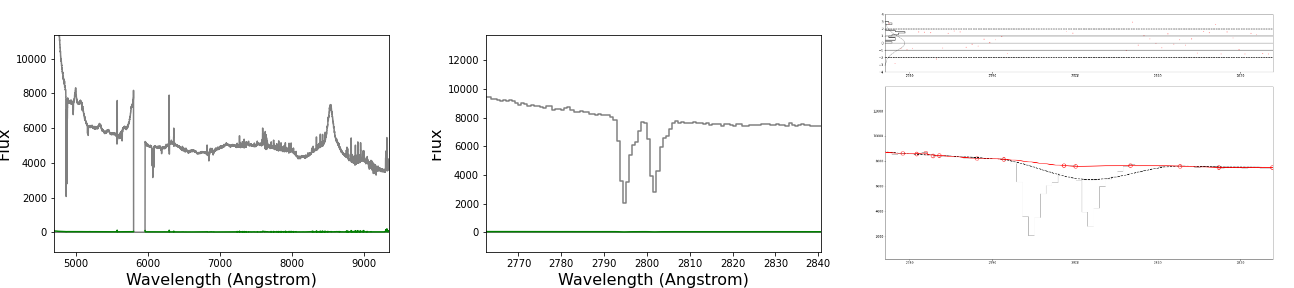

In [2]:
display(Image(filename='D:\Datacube\SDSSJ1515+1511\Continuum Fit 1511 B.png'))

In [2]:
%matplotlib qt
import matplotlib.pyplot as plt

In [3]:
# (A)
hdus_A = fits.open('D:\Datacube\SDSSJ1515+1511\spektrum_sum_SDSSJ1515+1511_A_0.8.fits')
spec_A = Spectrum('D:\Datacube\SDSSJ1515+1511\spektrum_sum_SDSSJ1515+1511_A_0.8.fits')

flux_A = hdus_A['DATA'].data*u.Unit(hdus_A[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_A = hdus_A['STAT'].data*u.Unit(hdus_A[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_A = np.sqrt(variance_A) #uncertainty is standard deviation
wavelength_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit)# Wavelength array

sp_A = XSpectrum1D.from_tuple((wavelength_A, flux_A, uncertainty_A))
sp_A.plot()

In [4]:
# (B)
hdus = fits.open('D:\Datacube\SDSSJ1515+1511\spektrum_sum_SDSSJ1515+1511_B_0.8.fits')
spec = Spectrum('D:\Datacube\SDSSJ1515+1511\spektrum_sum_SDSSJ1515+1511_B_0.8.fits')

flux = hdus['DATA'].data*u.Unit(hdus[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance = hdus['STAT'].data*u.Unit(hdus[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty = np.sqrt(variance) #uncertainty is standard deviation
wavelength = spec.wave.coord() * u.Unit(spec.wave.unit)# Wavelength array

sp = XSpectrum1D.from_tuple((wavelength, flux, uncertainty))
sp.plot()

In [5]:
z = 0.742

## (A) Mg II Continuum Fit

In [6]:
flux_masked_A = flux_A[90:200]
uncertainty_masked_A = uncertainty_A[90:200]
rest_wavelength_masked_A = wavelength_A[90:200]/(1+z)

sp_masked_rest_A = XSpectrum1D.from_tuple((rest_wavelength_masked_A, flux_masked_A, uncertainty_masked_A))
sp_masked_rest_A.plot()

(Skip 3 lines below if continuum already exist in npz file)

In [7]:
sp_masked_rest_A.fit_continuum()

knots file exists, use this? (y) n


C:\Users\hp\anaconda3\lib\site-packages\linetools\analysis\interactive_plot.py:347: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".r" (-> marker='.'). The keyword argument will take precedence.
  m0, = a1.plot([0],[0],'.r',marker='.', mec='none', lw=0, mew=0,



i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [8]:
sp_masked_rest_A.co

<Quantity [15593.979 , 15191.784 , 15161.685 , 15131.3125, 15100.659 ,
           15069.717 , 15038.477 , 15006.93  , 14975.068 , 14942.884 ,
           14910.368 , 14877.513 , 14844.31  , 14810.75  , 14776.825 ,
           14742.527 , 14707.848 , 14672.778 , 14637.31  , 14601.436 ,
           14565.1455, 14528.432 , 14491.286 , 14453.701 , 14415.547 ,
           14376.458 , 14336.524 , 14295.878 , 14254.649 , 14212.969 ,
           14170.969 , 14128.779 , 14086.531 , 14044.356 , 14002.386 ,
           13960.75  , 13919.579 , 13879.006 , 13839.16  , 13800.172 ,
           13761.855 , 13723.986 , 13686.54  , 13649.486 , 13612.801 ,
           13576.454 , 13540.421 , 13504.674 , 13469.185 , 13433.926 ,
           13398.872 , 13363.995 , 13329.269 , 13294.665 , 13260.156 ,
           13225.685 , 13191.116 , 13156.621 , 13122.412 , 13088.7   ,
           13055.697 , 13023.615 , 12992.666 , 12963.061 , 12935.012 ,
           12908.731 , 12884.431 , 12862.322 , 12842.617 , 12825.527 ,
      

In [9]:
np.savez("D:\Datacube\SDSSJ1515+1511\continuum_SDSSJ1515+1511_A.npz", values=sp_masked_rest_A.co.value, unit=str(sp_masked_rest_A.co.unit))

## (A) Mg I Continuum Fit

In [7]:
flux_masked_A2 = flux_A[180:250]
uncertainty_masked_A2 = uncertainty_A[180:250]
rest_wavelength_masked_A2 = wavelength_A[180:250]/(1+z)

sp_masked_rest_A2 = XSpectrum1D.from_tuple((rest_wavelength_masked_A2, flux_masked_A2, uncertainty_masked_A2))
sp_masked_rest_A2.plot()

(Skip 3 lines below if continuum already exist in npz file)

In [11]:
sp_masked_rest_A2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [12]:
sp_masked_rest_A2.co

<Quantity [12650.957 , 12650.957 , 12646.17  , 12642.159 , 12638.887 ,
           12636.317 , 12634.414 , 12633.139 , 12632.456 , 12632.328 ,
           12632.718 , 12633.59  , 12634.906 , 12636.63  , 12638.726 ,
           12641.154 , 12643.881 , 12646.867 , 12650.078 , 12653.476 ,
           12657.022 , 12660.683 , 12664.42  , 12668.195 , 12671.975 ,
           12675.719 , 12679.402 , 12683.767 , 12689.294 , 12695.985 ,
           12703.844 , 12712.871 , 12723.069 , 12734.44  , 12746.986 ,
           12760.71  , 12775.612 , 12791.697 , 12808.965 , 12827.418 ,
           12847.06  , 12867.891 , 12889.914 , 12913.131 , 12941.52  ,
           12980.655 , 13029.341 , 13086.294 , 13150.23  , 13219.869 ,
           13293.926 , 13371.118 , 13450.164 , 13529.781 , 13608.686 ,
           13688.111 , 13801.8   , 13938.315 , 14068.519 , 14163.2705,
           14191.567 , 14151.18  , 14065.693 , 13958.682 , 13842.923 ,
           13717.191 , 13579.324 , 13427.158 , 13258.532 , 13938.795 ] 1e-20 

In [13]:
np.savez("D:\Datacube\SDSSJ1515+1511\continuum_SDSSJ1515+1511_A_Mgi.npz", values=sp_masked_rest_A2.co.value, unit=str(sp_masked_rest_A2.co.unit))

## (B) Mg II Continuum Fit

In [8]:
flux_masked = flux[90:200]
uncertainty_masked = uncertainty[90:200]
rest_wavelength_masked = wavelength[90:200]/(1+z)

sp_masked_rest = XSpectrum1D.from_tuple((rest_wavelength_masked, flux_masked, uncertainty_masked))
sp_masked_rest.plot()

(Skip 3 lines below if continuum already exist in npz file)

In [15]:
sp_masked_rest.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [16]:
sp_masked_rest.co

<Quantity [11387.038 , 11238.401 , 11199.524 , 11160.647 , 11121.922 ,
           11083.3545, 11044.948 , 11006.71  , 10968.644 , 10930.756 ,
           10893.052 , 10855.536 , 10818.214 , 10781.09  , 10744.171 ,
           10707.461 , 10670.966 , 10634.69  , 10598.641 , 10562.821 ,
           10527.237 , 10491.894 , 10456.797 , 10421.951 , 10387.681 ,
           10354.7295, 10322.368 , 10289.749 , 10256.024 , 10220.893 ,
           10184.978 , 10148.902 , 10112.871 , 10076.525 , 10039.479 ,
           10001.341 ,  9961.727 ,  9920.245 ,  9876.512 ,  9826.72  ,
            9763.694 ,  9702.254 ,  9644.864 ,  9588.561 ,  9533.321 ,
            9479.122 ,  9425.942 ,  9373.758 ,  9322.546 ,  9272.285 ,
            9222.951 ,  9188.499 ,  9142.688 ,  9123.176 ,  9130.43  ,
            9146.034 ,  9167.214 ,  9191.191 ,  9215.188 ,  9236.428 ,
            9252.134 ,  9259.526 ,  9256.136 ,  9248.182 ,  9239.755 ,
            9231.725 ,  9224.956 ,  9219.524 ,  9214.516 ,  9209.701 ,
      

In [17]:
np.savez("D:\Datacube\SDSSJ1515+1511\continuum_SDSSJ1515+1511_B.npz", values=sp_masked_rest.co.value, unit=str(sp_masked_rest.co.unit))

## (B) Mg I Continuum Fit

In [9]:
flux_masked2 = flux[180:250]
uncertainty_masked2 = uncertainty[180:250]
rest_wavelength_masked2 = wavelength[180:250]/(1+z)

sp_masked_rest2 = XSpectrum1D.from_tuple((rest_wavelength_masked2, flux_masked2, uncertainty_masked2))
sp_masked_rest2.plot()

(Skip 3 lines below if continuum already exist in npz file)

In [19]:
sp_masked_rest2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [20]:
sp_masked_rest2.co

<Quantity [9060.35  , 9060.35  , 9055.623 , 9051.183 , 9046.974 ,
           9042.941 , 9039.031 , 9035.188 , 9031.359 , 9027.488 ,
           9023.525 , 9019.665 , 9016.023 , 9012.592 , 9009.363 ,
           9006.331 , 9003.488 , 9000.827 , 8998.34  , 8996.0205,
           8993.861 , 8991.8545, 8989.993 , 8988.2705, 8986.679 ,
           8985.211 , 8984.282 , 9008.501 , 9044.017 , 9053.879 ,
           9040.422 , 9025.693 , 9026.975 , 9037.55  , 9052.151 ,
           9067.261 , 9079.359 , 9082.77  , 9060.818 , 9051.71  ,
           9077.846 , 9112.334 , 9152.522 , 9196.241 , 9241.327 ,
           9286.847 , 9332.722 , 9378.883 , 9425.259 , 9471.779 ,
           9518.373 , 9564.971 , 9611.501 , 9657.893 , 9704.075 ,
           9749.979 , 9796.056 , 9843.822 , 9890.139 , 9931.24  ,
           9963.364 , 9982.448 , 9944.953 , 9853.999 , 9755.23  ,
           9662.751 , 9569.247 , 9472.739 , 9371.246 , 9786.837 ] 1e-20 erg / (Angstrom cm2 s)>

In [21]:
np.savez("D:\Datacube\SDSSJ1515+1511\continuum_SDSSJ1515+1511_B_Mgi.npz", values=sp_masked_rest2.co.value, unit=str(sp_masked_rest2.co.unit))

# 2. Continuum Subtraction

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

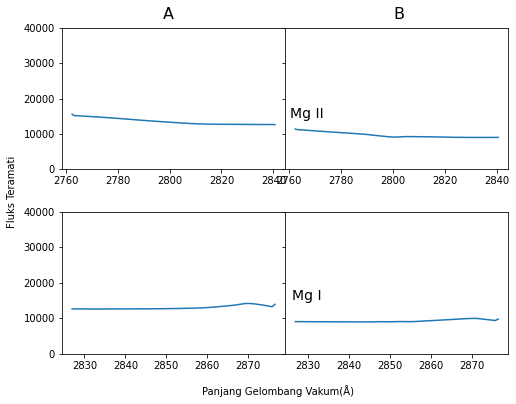

In [11]:
# (A) Mg II
wave0_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit) # Wavelength array
wave_A = wave0_A[90:200]/(1+z)
F0_A = spec_A.data * u.Unit(spec_A.unit) # Flux array
F_A = F0_A[90:200]
uncertain_A = uncertainty_A[90:200]

loaded_data_A = np.load("D:\Datacube\SDSSJ1515+1511\continuum_SDSSJ1515+1511_A.npz")
co_A = loaded_data_A["values"] * u.Unit(spec_A.unit)

# (A) Mg I
wave_A2 = wave0_A[180:250]/(1+z)
F_A2 = F0_A[180:250]
uncertain_A2 = uncertainty_A[180:250]

loaded_data_A2 = np.load("D:\Datacube\SDSSJ1515+1511\continuum_SDSSJ1515+1511_A_Mgi.npz")
co_A2 = loaded_data_A2["values"] * u.Unit(spec_A.unit)

# (B) Mg II
wave0 = spec.wave.coord() * u.Unit(spec.wave.unit) # Wavelength array
wave = wave0[90:200]/(1+z)
F0 = spec.data * u.Unit(spec.unit) # Flux array
F = F0[90:200]
uncertain = uncertainty[90:200]

loaded_data = np.load("D:\Datacube\SDSSJ1515+1511\continuum_SDSSJ1515+1511_B.npz")
co = loaded_data["values"] * u.Unit(spec.unit)

# (B) Mg I
wave2 = wave0[180:250]/(1+z)
F2 = F0[180:250]
uncertain2 = uncertainty[180:250]

loaded_data2 = np.load("D:\Datacube\SDSSJ1515+1511\continuum_SDSSJ1515+1511_B_Mgi.npz")
co2 = loaded_data2["values"] * u.Unit(spec.unit)

# Plot
f, ax = plt.subplots(2, 2, sharey='row', figsize=(8,6), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0,0].plot(wave_A, co_A)
ax[0,0].set_ylim(0, 40000)
ax[1,0].plot(wave_A2, co_A2)
ax[1,0].set_ylim(0, 40000)
#ax[1,0].set_xlabel('Panjang Gelombang (Å)')
ax[0,1].plot(wave, co)
ax[0,1].set_ylim(0, 40000)
ax[1,1].plot(wave2, co2)
ax[1,1].set_ylim(0, 40000)

f.text(0.55,0.67, 'Mg II', fontsize=14, ha='center')
f.text(0.55,0.25, 'Mg I', fontsize=14, ha='center')

f.text(0.3, 0.91, 'A', va='center', fontsize=16)
f.text(0.7, 0.91, 'B', va='center', fontsize=16)
f.text(0.5, 0.03, 'Panjang Gelombang Vakum(Å)', ha='center')
f.text(0.03, 0.5, 'Fluks Teramati', va='center', rotation='vertical')
plt.show()

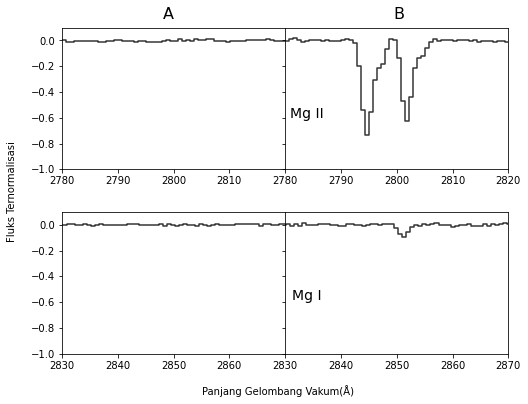

In [12]:
# (A) Mg II
wavelengths_A = wave_A.value
fluxes_A = (F_A.value / co_A.value) - 1
uncertainties_A = (uncertain_A.value / co_A.value)

# (A) Mg I
wavelengths_A2 = wave_A2.value
fluxes_A2 = (F_A2.value / co_A2.value) - 1
uncertainties_A2 = (uncertain_A2.value / co_A2.value)

# (B) Mg II
wavelengths = wave.value
fluxes = (F.value / co.value) - 1
uncertainties = (uncertain.value / co.value)

# (B) Mg I
wavelengths2 = wave2.value
fluxes2 = (F2.value / co2.value) - 1
uncertainties2 = (uncertain2.value / co2.value)

f, ax = plt.subplots(2, 2, sharey='row', figsize=(8,6), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0,0].plot(wavelengths_A, fluxes_A, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,0].set_ylim(-1.0,0.1)
ax[0,0].set_xlim(2780, 2820)

ax[1,0].plot(wavelengths_A2, fluxes_A2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,0].set_xlim(2830, 2870)
ax[1,0].set_ylim(-1.0,0.1)

ax[0,1].plot(wavelengths, fluxes, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,1].set_xlim(2780, 2820)
ax[0,1].set_ylim(-1.0,0.1)
ax[0,1].tick_params(labelleft=False)

ax[1,1].plot(wavelengths2, fluxes2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,1].set_xlim(2830, 2870)
ax[1,1].set_ylim(-1.0,0.1)

xticks1 = ax[0,0].get_xticks()
xticks1 = xticks1[:-1]  # remove the last tick
ax[0,0].set_xticks(xticks1)

xticks2 = ax[1,0].get_xticks()
xticks2 = xticks2[:-1]  # remove the last tick
ax[1,0].set_xticks(xticks2)

f.text(0.55,0.67, 'Mg II', fontsize=14, ha='center')
f.text(0.55,0.25, 'Mg I', fontsize=14, ha='center')

f.text(0.3, 0.91, 'A', va='center', fontsize=16)
f.text(0.7, 0.91, 'B', va='center', fontsize=16)
f.text(0.03, 0.5, 'Fluks Ternormalisasi', va='center', rotation='vertical')
f.text(0.5, 0.03, 'Panjang Gelombang Vakum(Å)', ha='center')
plt.show()

# 3. Equivalent Width

In [14]:
def compute_ew(wavelengths, flux, continuum_level, line_range):
    
    in_line_region = (wavelengths >= line_range[0]) & (wavelengths <= line_range[1])
    lam_line = wavelengths[in_line_region]
    flux_line = flux[in_line_region]

    absorption_mask = flux_line < continuum_level
    lam_absorb = lam_line[absorption_mask]
    flux_absorb = flux_line[absorption_mask]

    ew = - np.trapz(flux_absorb, lam_absorb)

    return ew

W_lambda = compute_ew(wavelengths, fluxes, continuum_level=0, line_range=(2791, 2799))
W_lambda2 = compute_ew(wavelengths, fluxes, continuum_level=0, line_range=(2799, 2807))
W_lambda3 = compute_ew(wavelengths2, fluxes2, continuum_level=0, line_range=(2847, 2855))

print(f"Equivalent Width (W) λ2976: {W_lambda:.3f} Å")
print(f"Equivalent Width (W) λ2804: {W_lambda2:.3f} Å")
print(f"Equivalent Width (W) λ2853: {W_lambda3:.3f} Å")

Equivalent Width (W) λ2976: 1.983 Å
Equivalent Width (W) λ2804: 1.533 Å
Equivalent Width (W) λ2853: 0.222 Å


# 4. Instrumental LSF

In [15]:
lambda_2796 = 2796.3543
lambda_2804 = 2803.5315
A_2796 = 2.60e+08
A_2804 = 2.57e+08
f2796 = 0.6123
f2804 = 0.3054

lambda_2853 = 2852.965
f2853 = 1.80
A_2853 = 4.91e+08

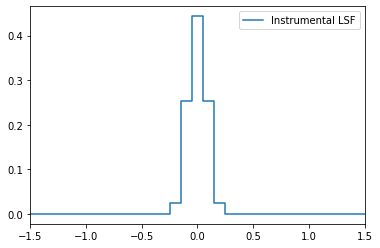

In [16]:
steps = wavelengths[1]-wavelengths[0]

lsf = LSF(typ='qsim_v1')
lsf_observed = lsf.get_LSF(lbda=lambda_2804*(1+z), step=steps, size=101) # size arbitrary asal ≥11 dan ganjil 
x_LSF = np.linspace(-5, 5, 101)
plt.plot(x_LSF, lsf_observed, drawstyle='steps-mid', label='Instrumental LSF')
plt.xlim(-1.5,1.5)
plt.legend()

# 5. Fitting (N, b)

In [17]:
c_kms = c.to('km/s').value
e = 4.8032 * 1e-10

## (B) Mg II Line Fitting

In [18]:
def convolved_model(wavelengths, x_0_2796, N, b, x_02_2796, N2, b2):
    x_0_2804 = x_0_2796 + (lambda_2804 - lambda_2796)
    x_02_2804 = x_02_2796 + (lambda_2804 - lambda_2796)

    fwhm_L_2796 = ((x_0_2796**2) * A_2796) / (2 * np.pi * c.value * 1e10)
    fwhm_L2_2796 = ((x_02_2796**2) * A_2796) / (2 * np.pi * c.value * 1e10)
    fwhm_L_2804 = ((x_0_2804**2) * A_2804) / (2 * np.pi * c.value * 1e10)
    fwhm_L2_2804 = ((x_02_2804**2) * A_2804) / (2 * np.pi * c.value * 1e10)

    fwhm_G_2796 = (2 * x_0_2796 * b * np.sqrt(np.log(2))) / c_kms
    fwhm_G2_2796 = (2 * x_02_2796 * b2 * np.sqrt(np.log(2))) / c_kms
    fwhm_G_2804 = (2 * x_0_2804 * b * np.sqrt(np.log(2))) / c_kms
    fwhm_G2_2804 = (2 * x_02_2804 * b2 * np.sqrt(np.log(2))) / c_kms

    amp_V_2796 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2796 * x_0_2796 * 1e-8 * N) / (m_e.cgs.value * c.cgs.value * b * 1e5))
    amp_V2_2796 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2796 * x_02_2796 * 1e-8 * N2) / (m_e.cgs.value * c.cgs.value * b2 * 1e5))
    amp_V_2804 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2804 * x_0_2804 * 1e-8 * N) / (m_e.cgs.value * c.cgs.value * b * 1e5))
    amp_V2_2804 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2804 * x_02_2804 * 1e-8 * N2) / (m_e.cgs.value * c.cgs.value * b2 * 1e5))
    
    voigt_peak_targets = [amp_V_2796, amp_V2_2796, amp_V_2804, amp_V2_2804]
    fwhm_Ls = [fwhm_L_2796, fwhm_L2_2796, fwhm_L_2804, fwhm_L2_2804]  
    fwhm_Gs = [fwhm_G_2796, fwhm_G2_2796, fwhm_G_2804, fwhm_G2_2804]          
    centers = [x_0_2796, x_02_2796, x_0_2804, x_02_2804]

    def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
        def residual(amplitude_L):
            model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
            return model(0) - target_peak

        sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
        return sol.root

    models = []

    for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
        amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
        model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        models.append(model)

    def combined_voigt(x):
        return sum(m(x) for m in models)

    intrinsic_profile = combined_voigt(wavelengths)
    return convolve(intrinsic_profile, lsf_observed, normalize_kernel=True)

p0 = [2794, 1e14, 30,
     2796, 1e13, 30]
bounds = ([2793.982,1e12,1,
          2795.418,1e12,1], 
          [2795.418,1e15,200,
          2798.288,1e15,200])

popt, _ = curve_fit(convolved_model, wavelengths, fluxes, p0=p0, bounds=bounds, 
                    sigma=uncertainties, absolute_sigma=True, maxfev=5000)
popt

array([2.79456366e+03, 1.40652426e+14, 7.70160386e+01, 2.79634598e+03,
       2.17476544e+13, 1.76437151e+02])

Estimated Noise Standard Deviation: 2.407


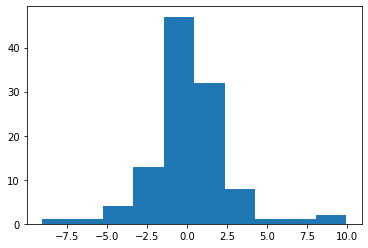

In [19]:
residuals = fluxes - convolved_model(wavelengths, *popt)

plt.hist(residuals / uncertainties)

std = np.std(residuals / uncertainties)
print(f"Estimated Noise Standard Deviation: {std:.3f}")

Estimated Noise Standard Deviation: 1.019


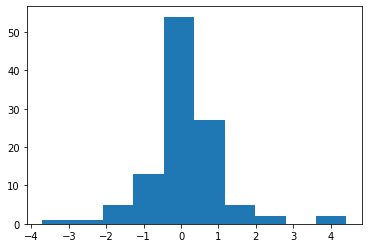

In [20]:
sigma_floor = 0.009
sigma_adjusted = np.sqrt(uncertainties**2 + sigma_floor**2)
sigma_adjusted2 = np.sqrt(uncertainties2**2 + sigma_floor**2)

plt.hist(residuals / sigma_adjusted)

std = np.std(residuals / sigma_adjusted)
print(f"Estimated Noise Standard Deviation: {std:.3f}")

In [21]:
chi_squared = np.sum((residuals / sigma_adjusted) ** 2)
dof = len(fluxes) - len(popt)

reduced_chi_squared = chi_squared / dof

print(f'Chi-squared: {chi_squared:.3f}')
print(f'Degree of freedom: {dof:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared:.3f}')

Chi-squared: 115.256
Degree of freedom: 104.000
Reduced Chi-squared: 1.108


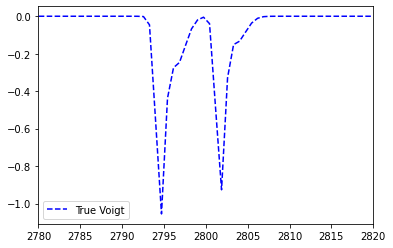

In [22]:
(recovered_peak_2796, recovered_N, recovered_b, 
 recovered_peak2_2796, recovered_N2, recovered_b2) = popt

recovered_peak_2804 = recovered_peak_2796 + (lambda_2804 - lambda_2796)
recovered_peak2_2804 = recovered_peak2_2796 + (lambda_2804 - lambda_2796)

fwhm_L_2796 = ((recovered_peak_2796**2) * A_2796) / (2 * np.pi * c.value * 1e10)
fwhm_L2_2796 = ((recovered_peak2_2796**2) * A_2796) / (2 * np.pi * c.value * 1e10)
fwhm_L_2804 = ((recovered_peak_2804**2) * A_2804) / (2 * np.pi * c.value * 1e10)
fwhm_L2_2804 = ((recovered_peak2_2804**2) * A_2804) / (2 * np.pi * c.value * 1e10)
    
fwhm_G_2796 = (2 * recovered_peak_2796 * recovered_b * np.sqrt(np.log(2))) / c_kms
fwhm_G2_2796 = (2 * recovered_peak2_2796 * recovered_b2 * np.sqrt(np.log(2))) / c_kms
fwhm_G_2804 = (2 * recovered_peak_2804 * recovered_b * np.sqrt(np.log(2))) / c_kms
fwhm_G2_2804 = (2 * recovered_peak2_2804 * recovered_b2 * np.sqrt(np.log(2))) / c_kms
    
amp_V_2796 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2796 * recovered_peak_2796 * 1e-8 * recovered_N) / (m_e.cgs.value * c.cgs.value * recovered_b * 1e5))
amp_V2_2796 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2796 * recovered_peak2_2796 * 1e-8 * recovered_N2) / (m_e.cgs.value * c.cgs.value * recovered_b2 * 1e5))
amp_V_2804 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2804 * recovered_peak_2804 * 1e-8 * recovered_N) / (m_e.cgs.value * c.cgs.value * recovered_b * 1e5))
amp_V2_2804 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2804 * recovered_peak2_2804 * 1e-8 * recovered_N2) / (m_e.cgs.value * c.cgs.value * recovered_b2 * 1e5))

voigt_peak_targets = [amp_V_2796, amp_V2_2796, amp_V_2804, amp_V2_2804]
fwhm_Ls = [fwhm_L_2796, fwhm_L2_2796, fwhm_L_2804, fwhm_L2_2804]  
fwhm_Gs = [fwhm_G_2796, fwhm_G2_2796, fwhm_G_2804, fwhm_G2_2804]          
centers = [recovered_peak_2796, recovered_peak2_2796, recovered_peak_2804, recovered_peak2_2804]

def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
    def residual(amplitude_L):
        model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        return model(0) - target_peak
        
    sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
    return sol.root
    
models = []
amp_Ls = []

for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
    amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
    amp_Ls.append(amp_L)
    model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
    models.append(model)
    
def combined_voigt(x):
    return sum(m(x) for m in models)
    
true_spectrum = combined_voigt(wavelengths)

plt.plot(wavelengths, true_spectrum, '--', label="True Voigt", color='blue')
plt.xlim(2780, 2820)
plt.legend()

In [24]:
m_mg = 24.305 * 1.66e-27

T_estimate = (((recovered_b * 1e3)**2) * m_mg) / (2 * const.Boltzmann)
T_estimate2 = (((recovered_b2 * 1e3)**2) * m_mg) / (2 * const.Boltzmann)

print(f"b Estimation Component 1: {recovered_b:.3f} km/s")
print(f"Temperature Estimation Component 1: {T_estimate:.3e} K")

print(f"b Estimation Component 2: {recovered_b2:.3f} km/s")
print(f"Temperature Estimation Component 2: {T_estimate2:.3e} K")

b Estimation Component 1: 77.016 km/s
Temperature Estimation Component 1: 8.667e+06 K
b Estimation Component 2: 176.437 km/s
Temperature Estimation Component 2: 4.549e+07 K


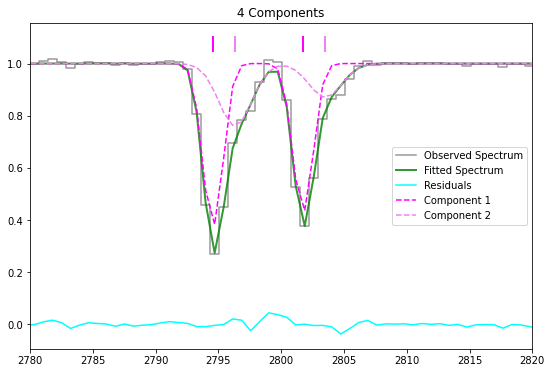

In [23]:
fitted_spectrum = convolve(true_spectrum, lsf_observed, normalize_kernel=True)

plt.figure()
plt.plot(wavelengths, fluxes+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
#plt.plot(wavelengths, true_spectrum+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths, fitted_spectrum+1, label="Fitted Spectrum", lw=2, alpha=0.8, color='green')
plt.plot(wavelengths, residuals, label='Residuals', color='cyan')

v1 = (Voigt1D(x_0=recovered_peak_2796, amplitude_L=amp_Ls[0], fwhm_L=fwhm_L_2796, fwhm_G=fwhm_G_2796)
     + Voigt1D(x_0=recovered_peak_2804, amplitude_L=amp_Ls[2], fwhm_L=fwhm_L_2804, fwhm_G=fwhm_G_2804))
v2 = (Voigt1D(x_0=recovered_peak2_2796, amplitude_L=amp_Ls[1], fwhm_L=fwhm_L2_2796, fwhm_G=fwhm_G2_2796)
     + Voigt1D(x_0=recovered_peak2_2804, amplitude_L=amp_Ls[3], fwhm_L=fwhm_L2_2804, fwhm_G=fwhm_G2_2804))

plt.plot(wavelengths, 1 - convolve(v1(wavelengths), lsf_observed, normalize_kernel=True), '--', 
         label='Component 1', color='magenta')
plt.plot(wavelengths, 1 - convolve(v2(wavelengths), lsf_observed, normalize_kernel=True), '--', 
         label='Component 2', color='violet')

line_positions1 = [recovered_peak_2796, recovered_peak_2804]
line_positions2 = [recovered_peak2_2796, recovered_peak2_2804]

for xpos in line_positions1:
    plt.plot([xpos, xpos], [1.05, 1.1], color='magenta', linewidth=2)
for xpos in line_positions2:
    plt.plot([xpos, xpos], [1.05, 1.1], color='violet', linewidth=2)
    
plt.xlim(2780, 2820)
plt.title("2 Components")
#plt.ylim(-0.1,1.15)
plt.legend()

## (B) Mg I Line Fitting

In [26]:
def convolved_model2(wavelengths, x_0_2853, N, b):
    fwhm_L_2853 = ((x_0_2853**2) * A_2853) / (2 * np.pi * c.value * 1e10)

    fwhm_G_2853 = (2 * x_0_2853 * b * np.sqrt(np.log(2))) / c_kms

    amp_V_2853 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2853 * x_0_2853 * 1e-8 * N) / (m_e.cgs.value * c.cgs.value * b * 1e5))
    
    voigt_peak_targets = [amp_V_2853]
    fwhm_Ls = [fwhm_L_2853]  
    fwhm_Gs = [fwhm_G_2853]          
    centers = [x_0_2853]

    def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
        def residual(amplitude_L):
            model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
            return model(0) - target_peak

        sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
        return sol.root

    models = []

    for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
        amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
        model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        models.append(model)

    def combined_voigt(x):
        return sum(m(x) for m in models)

    intrinsic_profile = combined_voigt(wavelengths)
    return convolve(intrinsic_profile, lsf_observed, normalize_kernel=True)

p02 = [2852, 1e12, 30]
bounds2 = ([2850,1e10,1], 
          [2854,1e13,200])
#2850.6705878659586
#2852.1057198981057
popt2, _ = curve_fit(convolved_model2, wavelengths2, fluxes2, p0=p02, bounds=bounds2, 
                    sigma=uncertainties2, absolute_sigma=True, maxfev=5000)
popt2

array([2.85130865e+03, 1.60375267e+12, 7.77652879e+01])

Estimated Noise Standard Deviation: 1.988


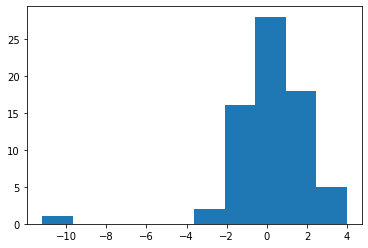

In [28]:
residuals2 = fluxes2 - convolved_model2(wavelengths2, *popt2)

plt.hist(residuals2 / uncertainties2)

std2 = np.std(residuals2 / uncertainties2)
print(f"Estimated Noise Standard Deviation: {std2:.3f}")

Estimated Noise Standard Deviation: 1.045


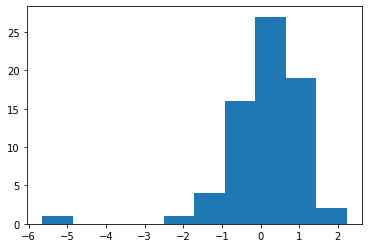

In [29]:
sigma_floor2 = 0.0065
sigma_adjusted2 = np.sqrt(uncertainties2**2 + sigma_floor2**2)

plt.hist(residuals2 / sigma_adjusted2)

std = np.std(residuals2 / sigma_adjusted2)
print(f"Estimated Noise Standard Deviation: {std:.3f}")

In [30]:
chi_squared2 = np.sum((residuals2 / sigma_adjusted2) ** 2)
dof2 = len(fluxes2) - len(popt2)

reduced_chi_squared2 = chi_squared2 / dof2

print(f'Chi-squared: {chi_squared2:.3f}')
print(f'Degree of freedom: {dof2:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared2:.3f}')

Chi-squared: 77.498
Degree of freedom: 67.000
Reduced Chi-squared: 1.157


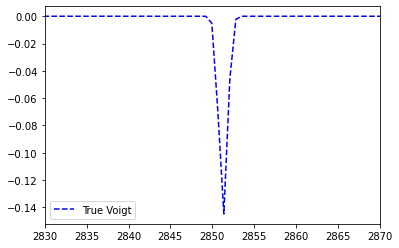

In [31]:
(recovered_peak_2853, recovered_N_2853, recovered_b_2853) = popt2

fwhm_L_2853 = ((recovered_peak_2853**2) * A_2853) / (2 * np.pi * c.value * 1e10)
    
fwhm_G_2853 = (2 * recovered_peak_2853 * recovered_b_2853 * np.sqrt(np.log(2))) / c_kms
    
amp_V_2853 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2853 * recovered_peak_2853 * 1e-8 * recovered_N_2853) / (m_e.cgs.value * c.cgs.value * recovered_b_2853 * 1e5))

voigt_peak_targets = [amp_V_2853]
fwhm_Ls = [fwhm_L_2853]  
fwhm_Gs = [fwhm_G_2853]          
centers = [recovered_peak_2853]

def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
    def residual(amplitude_L):
        model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        return model(0) - target_peak
        
    sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
    return sol.root
    
models = []
amp_Ls = []

for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
    amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
    amp_Ls.append(amp_L)
    model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
    models.append(model)
    
def combined_voigt(x):
    return sum(m(x) for m in models)
    
true_spectrum_2853 = combined_voigt(wavelengths2)

plt.plot(wavelengths2, true_spectrum_2853, '--', label="True Voigt", color='blue')
plt.xlim(2830, 2870)
plt.legend()

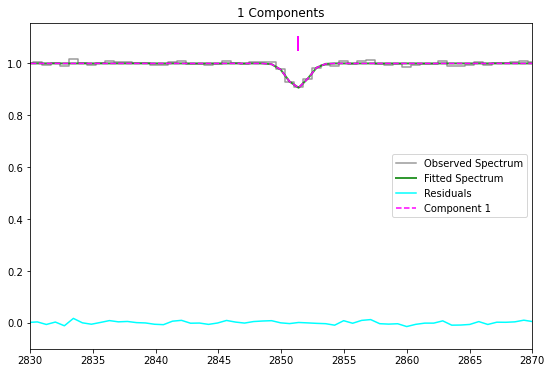

In [33]:
fitted_spectrum_2853 = convolve(true_spectrum_2853, lsf_observed, normalize_kernel=True)

plt.figure()
plt.plot(wavelengths2, fluxes2+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
#plt.plot(wavelengths, true_spectrum+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths2, fitted_spectrum_2853+1, label="Fitted Spectrum", lw=2, alpha=0.8, color='green')
plt.plot(wavelengths2, residuals2, label='Residuals', color='cyan')

v1 = Voigt1D(x_0=recovered_peak_2853, amplitude_L=amp_Ls[0], fwhm_L=fwhm_L_2853, fwhm_G=fwhm_G_2853)

plt.plot(wavelengths2, 1 - convolve(v1(wavelengths2), lsf_observed, normalize_kernel=True), '--', 
         label='Component 1', color='magenta')

line_positions1 = [recovered_peak_2853]

for xpos in line_positions1:
    plt.plot([xpos, xpos], [1.05, 1.1], color='magenta', linewidth=2)
    
plt.xlim(2830, 2870)
plt.title("1 Components")
#plt.ylim(-0.1,1.15)
plt.legend()

# 6. Monte Carlo

In [34]:
sim_W = []
sim_W2 = []
sim_W3 = []

sim_x_0 = []
sim_x_02 = []
sim_N = []
sim_N2 = []
sim_b = []
sim_b2 = []

sim_x_03 = []
sim_N3 = []
sim_b3 = []

sim_chi = []
sim_reduced_chi = []

sim_chi2 = []
sim_reduced_chi2 = []

n_sim = 100

for x in range(0, n_sim):
    sim_fluxes = fluxes + np.random.normal(0, sigma_adjusted)
    sim_fluxes2 = fluxes2 + np.random.normal(0, sigma_adjusted2)
    
    W_lambda = compute_ew(wavelengths, sim_fluxes, continuum_level=0, line_range=(2791, 2799))
    W_lambda2 = compute_ew(wavelengths, sim_fluxes, continuum_level=0, line_range=(2799, 2807))
    W_lambda3 = compute_ew(wavelengths2, sim_fluxes2, continuum_level=0, line_range=(2847, 2855))
    sim_W.append(W_lambda)
    sim_W2.append(W_lambda2)
    sim_W3.append(W_lambda3)

    popt, _ = curve_fit(convolved_model, wavelengths, sim_fluxes, p0=p0, 
                        bounds=bounds, sigma=sigma_adjusted, absolute_sigma=True, maxfev=5000)
    (recovered_peak_2796, recovered_N, recovered_b, 
     recovered_peak2_2796, recovered_N2, recovered_b2) = popt
    
    popt2, __ = curve_fit(convolved_model2, wavelengths2, sim_fluxes2, p0=p02, 
                        bounds=bounds2, sigma=sigma_adjusted2, absolute_sigma=True, maxfev=5000)
    recovered_peak_2853, recovered_N3, recovered_b3 = popt2
    
    sim_x_0.append(recovered_peak_2796)
    sim_x_02.append(recovered_peak2_2796)
    sim_N.append(recovered_N)
    sim_N2.append(recovered_N2)
    sim_b.append(recovered_b)
    sim_b2.append(recovered_b2)
    
    sim_x_03.append(recovered_peak_2853)
    sim_N3.append(recovered_N3)
    sim_b3.append(recovered_b3)
    
    residuals = sim_fluxes - convolved_model(wavelengths, *popt)
    chi_squared = np.sum((residuals / sigma_adjusted) ** 2)
    dof = len(sim_fluxes) - len(popt)
    reduced_chi_squared = chi_squared / dof
    
    residuals2 = sim_fluxes2 - convolved_model2(wavelengths2, *popt2)
    chi_squared2 = np.sum((residuals2 / sigma_adjusted2) ** 2)
    dof2 = len(sim_fluxes2) - len(popt2)
    reduced_chi_squared2 = chi_squared2 / dof2
    
    sim_chi.append(chi_squared)
    sim_reduced_chi.append(reduced_chi_squared)
    
    sim_chi2.append(chi_squared2)
    sim_reduced_chi2.append(reduced_chi_squared2)
print("Simulation is done")

Simulation is done


In [35]:
sim_W = np.array(sim_W)
W_mean = np.mean(sim_W)
W_std = np.std(sim_W)

sim_W2 = np.array(sim_W2)
W2_mean = np.mean(sim_W2)
W2_std = np.std(sim_W2)

sim_W3 = np.array(sim_W3)
W3_mean = np.mean(sim_W3)
W3_std = np.std(sim_W3)

print(f"Equivalent Width λ2796: {W_mean:.3f} Angstrom")
print(f"EW λ2796 errors(1σ): {W_std:.3f} Angstrom")
print(f"Equivalent Width λ2804: {W2_mean:.3f} Angstrom")
print(f"EW λ2804 errors(1σ): {W2_std:.3f} Angstrom")
print(f"Equivalent Width λ2853: {W3_mean:.3f} Angstrom")
print(f"EW λ2853 errors(1σ): {W3_std:.3f} Angstrom")

Equivalent Width λ2796: 1.990 Angstrom
EW λ2796 errors(1σ): 0.020 Angstrom
Equivalent Width λ2804: 1.561 Angstrom
EW λ2804 errors(1σ): 0.041 Angstrom
Equivalent Width λ2853: 0.216 Angstrom
EW λ2853 errors(1σ): 0.023 Angstrom


In [36]:
sim_x_0 = np.array(sim_x_0)
x_0_2796_mean = np.mean(sim_x_0)
x_0_2796_std = np.std(sim_x_0)

sim_x_02 = np.array(sim_x_02)
x_02_2796_mean = np.mean(sim_x_02)
x_02_2796_std = np.std(sim_x_02)

x_0_2804_mean = x_0_2796_mean + (lambda_2804 - lambda_2796)
x_0_2804_std = x_0_2796_std

x_02_2804_mean = x_02_2796_mean + (lambda_2804 - lambda_2796)
x_02_2804_std = x_02_2796_std

print(f"Fitted Peak Component 1: {x_0_2796_mean:.3f} Angstrom")
print(f"Peak Component 1 errors(1σ): {x_0_2796_std:.3f} Angstrom")
print(f"Fitted Peak Component 2: {x_02_2796_mean:.3f} Angstrom")
print(f"Peak Component 2 errors(1σ): {x_02_2796_std:.3f} Angstrom")

Fitted Peak Component 1: 2794.590 Angstrom
Peak Component 1 errors(1σ): 0.058 Angstrom
Fitted Peak Component 2: 2796.489 Angstrom
Peak Component 2 errors(1σ): 0.338 Angstrom


In [37]:
sim_N = np.array(sim_N)
N_mean = np.log10(np.mean(sim_N))
N_std = (1/np.log(10)) * (np.std(sim_N) / np.mean(sim_N))

sim_N2 = np.array(sim_N2)
N2_mean = np.log10(np.mean(sim_N2))
N2_std = (1/np.log(10)) * (np.std(sim_N2) / np.mean(sim_N2))

print(f"Fitted Column Density (log N) Component 1: {N_mean:.3f} 1/cm^2")
print(f"N Component 1 errors(1σ): {N_std:.3f} 1/cm^2")
print(f"Fitted Column Density (log N) Component 2: {N2_mean:.3f} 1/cm^2")
print(f"N Component 2 errors(1σ): {N2_std:.3f} 1/cm^2")

Fitted Column Density (log N) Component 1: 14.156 1/cm^2
N Component 1 errors(1σ): 0.025 1/cm^2
Fitted Column Density (log N) Component 2: 13.311 1/cm^2
N Component 2 errors(1σ): 0.073 1/cm^2


In [38]:
sim_b = np.array(sim_b)
b_mean = np.mean(sim_b)
b_std = np.std(sim_b)

sim_b2 = np.array(sim_b2)
b2_mean = np.mean(sim_b2)
b2_std = np.std(sim_b2)

print(f"Fitted Doppler Parameter (b) Component 1: {b_mean:.3f} km/s")
print(f"b Component 1 errors(1σ): {b_std:.3f} km/s")
print(f"Fitted Doppler Parameter (b) Component 2: {b2_mean:.3f} km/s")
print(f"b Component 2 errors(1σ): {b2_std:.3f} km/s")

Fitted Doppler Parameter (b) Component 1: 80.739 km/s
b Component 1 errors(1σ): 9.821 km/s
Fitted Doppler Parameter (b) Component 2: 152.259 km/s
b Component 2 errors(1σ): 47.329 km/s


In [39]:
sim_chi = np.array(sim_chi)
chi_mean = np.mean(sim_chi)
chi_std = np.std(sim_chi)

sim_reduced_chi = np.array(sim_reduced_chi)
reduced_chi_mean = np.mean(sim_reduced_chi)
reduced_chi_std = np.std(sim_reduced_chi)

print(f"Mean Chi-squared: {chi_mean:.3f}")
print(f"Chi-squared errors(1σ): {chi_std:.3f}")
print(f"Mean Reduced Chi-squared: {reduced_chi_mean:.3f}")
print(f"Reduced Chi-squared errors(1σ): {reduced_chi_std:.3f}")

Mean Chi-squared: 210.429
Chi-squared errors(1σ): 28.119
Mean Reduced Chi-squared: 2.023
Reduced Chi-squared errors(1σ): 0.270


In [40]:
sim_x_03 = np.array(sim_x_03)
x_0_2853_mean = np.mean(sim_x_03)
x_0_2853_std = np.std(sim_x_03)

print(f"Fitted Peak Mg I: {x_0_2853_mean:.3f} Angstrom")
print(f"Peak Mg I errors(1σ): {x_0_2853_std:.3f} Angstrom")

sim_N3 = np.array(sim_N3)
N3_mean = np.log10(np.mean(sim_N3))
N3_std = (1/np.log(10)) * (np.std(sim_N3) / np.mean(sim_N3))

print(f"Fitted Column Density (log N) Mg I: {N3_mean:.3f} 1/cm^2")
print(f"N Mg I errors(1σ): {N3_std:.3f} 1/cm^2")

sim_b3 = np.array(sim_b3)
b3_mean = np.mean(sim_b3)
b3_std = np.std(sim_b3)

print(f"Fitted Doppler Parameter (b) Mg I: {b3_mean:.3f} km/s")
print(f"b Mg I errors(1σ): {b3_std:.3f} km/s")

sim_chi2 = np.array(sim_chi2)
chi2_mean = np.mean(sim_chi2)
chi2_std = np.std(sim_chi2)

sim_reduced_chi2 = np.array(sim_reduced_chi2)
reduced_chi2_mean = np.mean(sim_reduced_chi2)
reduced_chi2_std = np.std(sim_reduced_chi2)

print(f"Mean Chi-squared: {chi2_mean:.3f}")
print(f"Chi-squared errors(1σ): {chi2_std:.3f}")
print(f"Mean Reduced Chi-squared: {reduced_chi2_mean:.3f}")
print(f"Reduced Chi-squared errors(1σ): {reduced_chi2_std:.3f}")

Fitted Peak Mg I: 2851.313 Angstrom
Peak Mg I errors(1σ): 0.092 Angstrom
Fitted Column Density (log N) Mg I: 12.205 1/cm^2
N Mg I errors(1σ): 0.031 1/cm^2
Fitted Doppler Parameter (b) Mg I: 76.768 km/s
b Mg I errors(1σ): 13.888 km/s
Mean Chi-squared: 147.464
Chi-squared errors(1σ): 25.493
Mean Reduced Chi-squared: 2.201
Reduced Chi-squared errors(1σ): 0.380


# 7. Parameter Estimation

In [42]:
# [Mg/H]

solar_log_Mg_H = -4.40
N_HI = 3.5e19
log_N_HI = np.log10(N_HI)

mg_h = N_mean - log_N_HI - solar_log_Mg_H
print(log_N_HI)
print(f"[Mg/H] = {mg_h:.2f} dex")

19.544068044350276
[Mg/H] = -0.99 dex


In [47]:
vel_sys_2796 = ((x_0_2796_mean - lambda_2796) / lambda_2796) * c_kms
vel_sys2_2796 = ((x_02_2796_mean - lambda_2796) / lambda_2796) * c_kms
vel_sys_2804 = ((x_0_2804_mean - lambda_2804) / lambda_2804) * c_kms
vel_sys2_2804 = ((x_02_2804_mean - lambda_2804) / lambda_2804) * c_kms

err_vel_sys_2796 = (c_kms / lambda_2796) * x_0_2796_std
err_vel_sys2_2796 = (c_kms / lambda_2796) * x_02_2796_std
err_vel_sys_2804 = (c_kms / lambda_2804) * x_0_2804_std
err_vel_sys2_2804 = (c_kms / lambda_2804) * x_02_2804_std

vel_sys1 = (vel_sys_2796 + vel_sys_2804) / 2
vel_sys2 = (vel_sys2_2796 + vel_sys2_2804) / 2

err_vel_sys1 = 0.5 * np.sqrt(((err_vel_sys_2796)**2) + ((err_vel_sys_2804)**2))
err_vel_sys2 = 0.5 * np.sqrt(((err_vel_sys2_2796)**2) + ((err_vel_sys2_2804)**2))

print(f"System Velocity Component 1: {vel_sys1:.3f} ± {err_vel_sys1:.3f} km/s")
print(f"System Velocity Component 2: {vel_sys2:.3f} ± {err_vel_sys2:.3f} km/s")

System Velocity Component 1: -188.936 ± 4.388 km/s
System Velocity Component 2: 14.383 ± 25.571 km/s


In [48]:
vr1 = recovered_b / np.sqrt(2)
vr2 = recovered_b2 / np.sqrt(2)

err_vr1 = b_std / np.sqrt(2)
err_vr2 = b2_std / np.sqrt(2)

print(f"Velocity Dispersion 1: {vr1:.3f} ± {err_vr1:.3f} km/s")
print(f"Velocity Dispersion 2: {vr2:.3f} ± {err_vr2:.3f} km/s")

Velocity Dispersion 1: 51.582 ± 6.945 km/s
Velocity Dispersion 2: 129.878 ± 33.467 km/s


In [2]:
misal_vr = 20 # in km/s

misal_b_dari_vr = misal_vr * np.sqrt(2)
print(f"b: {misal_b_dari_vr:.3f} km/s")

b: 28.284 km/s


In [49]:
m_mg = 24.305 * 1.66e-27
T1 = (((b_mean * 1e3)**2) * m_mg) / (2 * const.Boltzmann)
T2 = (((b2_mean * 1e3)**2) * m_mg) / (2 * const.Boltzmann)

err_T1 = (2 * T1 * b_std) / b_mean
err_T2 = (2 * T2 * b2_std) / b2_mean

print(f"Temperature 1: {T1:.3e} ± {err_T1:.3e} K")
print(f"Temperature 2: {T2:.3e} ± {err_T1:.3e} K")

Temperature 1: 9.525e+06 ± 2.317e+06 K
Temperature 2: 3.387e+07 ± 2.317e+06 K


# 8. Relative Velocity & Corner Plot

In [43]:
v_2796 = c_kms * (wavelengths - lambda_2796) / lambda_2796
v_2804 = c_kms * (wavelengths - lambda_2804) / lambda_2804
v_2853 = c_kms * (wavelengths2 - lambda_2853) / lambda_2853

In [44]:
vline_2796 = c_kms * (x_0_2796_mean - lambda_2796) / lambda_2796
vline2_2796 = c_kms * (x_02_2796_mean - lambda_2796) / lambda_2796
vline_2804 = c_kms * (x_0_2804_mean - lambda_2804) / lambda_2804
vline2_2804 = c_kms * (x_02_2804_mean - lambda_2804) / lambda_2804
vline_2853 = c_kms * (x_0_2853_mean - lambda_2853) / lambda_2853

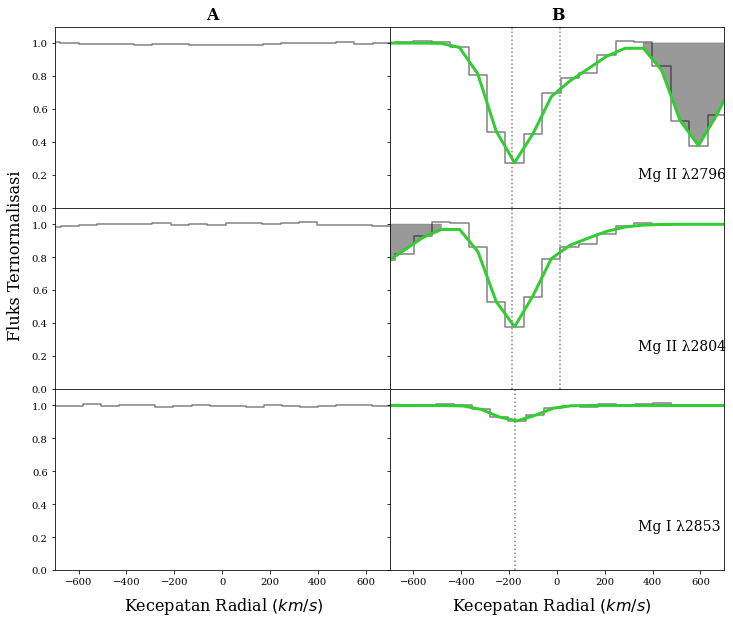

In [46]:
f, ax = plt.subplots(3, 2, figsize=(12,10), sharey='row', sharex=True, gridspec_kw={'hspace': 0, 'wspace':0})
plt.rcParams['font.family'] = 'serif'

ax[0,0].plot(v_2796, fluxes_A+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[0,0].set_ylim(-0,1.1)
ax[0,0].set_xlim(-700, 700)

ax[1,0].plot(v_2804, fluxes_A+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[2,0].plot(v_2853, fluxes_A2+1, 'k', alpha=0.5, drawstyle='steps-mid')

ax[0,1].plot(v_2796, fluxes+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[0,1].plot(v_2796, fitted_spectrum+1, color='limegreen', lw=3)
ax[0,1].plot(v_2796, residual, color='cyan', lw=1)
ax[0,1].fill_between(v_2796, fitted_spectrum+1, 1, where=(v_2796 > 350), color='gray', alpha=0.8)
ax[0,1].axvline(vline_2796, color="grey", linestyle=":")
ax[0,1].axvline(vline2_2796, color="grey", linestyle=":")
ax[0,1].set_xlim(-700, 700)
ax[0,1].set_ylim(0, 1.1)

ax[1,1].plot(v_2804, fluxes+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[1,1].plot(v_2804, fitted_spectrum+1, color='limegreen', lw=3)
ax[1,1].plot(v_2804, residual, color='cyan', lw=1)
ax[1,1].fill_between(v_2804, fitted_spectrum+1, 1, where=(v_2804 < -450), color='gray', alpha=0.8)
ax[1,1].axvline(vline_2804, color="grey", linestyle=":")
ax[1,1].axvline(vline2_2804, color="grey", linestyle=":")
ax[1,1].set_ylim(0, 1.1)

ax[2,1].plot(v_2853, fluxes2+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[2,1].plot(v_2853, fitted_spectrum_2853+1, color='limegreen', lw=3)
ax[2,1].plot(v_2853, residual2, color='cyan', lw=1)
ax[2,1].axvline(vline_2853, color="grey", linestyle=":")
ax[2,1].set_ylim(0, 1.1)

f.text(0.3, 0.89, 'A', fontsize=16, fontweight='bold')
f.text(0.7, 0.89, 'B', fontsize=16, fontweight='bold')

f.text(0.79,0.67, 'Mg II λ2796', fontsize=14)
f.text(0.79,0.43, 'Mg II λ2804', fontsize=14)
f.text(0.79,0.18, 'Mg I λ2853', fontsize=14)

f.text(0.32, 0.07, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.7, 0.07, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.07, 0.45, 'Fluks Ternormalisasi', fontsize=16, rotation='vertical')

plt.show()

Text(0.03, 0.4, 'Fluks Ternormalisasi')

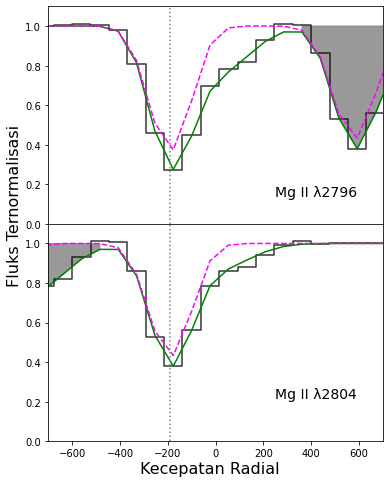

In [86]:
f, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True, gridspec_kw={'hspace': 0, 'wspace':0})

ax[0].plot(v_2796, fluxes+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0].plot(v_2796, fitted_spectrum+1, color='green')
ax[0].plot(v_2796, 1 - convolve(v1(wavelengths), lsf_observed, normalize_kernel=True), '--', color='magenta')
ax[0].fill_between(v_2796, fitted_spectrum+1, 1, where=(v_2796 > 350), color='gray', alpha=0.8)
ax[0].axvline(vline_2796, color="grey", linestyle=":")
#ax[0].axvline(vline2_2796, color="grey", linestyle=":")
ax[0].set_xlim(-700, 700)
ax[0].set_ylim(0, 1.1)



ax[1].plot(v_2804, fluxes+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1].plot(v_2804, fitted_spectrum+1, color='green')
ax[1].plot(v_2804, 1 - convolve(v1(wavelengths), lsf_observed, normalize_kernel=True), '--', color='magenta')
ax[1].fill_between(v_2804, fitted_spectrum+1, 1, where=(v_2804 < -450), color='gray', alpha=0.8)
ax[1].axvline(vline_2804, color="grey", linestyle=":")
#ax[1].axvline(vline2_2804, color="grey", linestyle=":")
ax[1].set_ylim(0, 1.1)

f.text(0.65,0.55, 'Mg II λ2796', fontsize=14)
f.text(0.65,0.2, 'Mg II λ2804', fontsize=14)

f.text(0.5, 0.07, 'Kecepatan Radial', fontsize=16, ha='center')
f.text(0.03, 0.4, 'Fluks Ternormalisasi', fontsize=16, rotation='vertical')

Text(0.03, 0.4, 'Fluks Ternormalisasi')

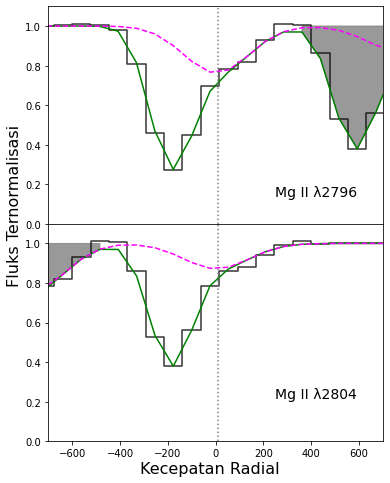

In [87]:
f, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True, gridspec_kw={'hspace': 0, 'wspace':0})

ax[0].plot(v_2796, fluxes+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0].plot(v_2796, fitted_spectrum+1, color='green')
ax[0].plot(v_2796, 1 - convolve(v2(wavelengths), lsf_observed, normalize_kernel=True), '--', color='magenta')
ax[0].fill_between(v_2796, fitted_spectrum+1, 1, where=(v_2796 > 350), color='gray', alpha=0.8)
#ax[0].axvline(vline_2796, color="grey", linestyle=":")
ax[0].axvline(vline2_2796, color="grey", linestyle=":")
ax[0].set_xlim(-700, 700)
ax[0].set_ylim(0, 1.1)



ax[1].plot(v_2804, fluxes+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1].plot(v_2804, fitted_spectrum+1, color='green')
ax[1].plot(v_2804, 1 - convolve(v2(wavelengths), lsf_observed, normalize_kernel=True), '--', color='magenta')
ax[1].fill_between(v_2804, fitted_spectrum+1, 1, where=(v_2804 < -450), color='gray', alpha=0.8)
#ax[1].axvline(vline_2804, color="grey", linestyle=":")
ax[1].axvline(vline2_2804, color="grey", linestyle=":")
ax[1].set_ylim(0, 1.1)

f.text(0.65,0.55, 'Mg II λ2796', fontsize=14)
f.text(0.65,0.2, 'Mg II λ2804', fontsize=14)

f.text(0.5, 0.07, 'Kecepatan Radial', fontsize=16, ha='center')
f.text(0.03, 0.4, 'Fluks Ternormalisasi', fontsize=16, rotation='vertical')

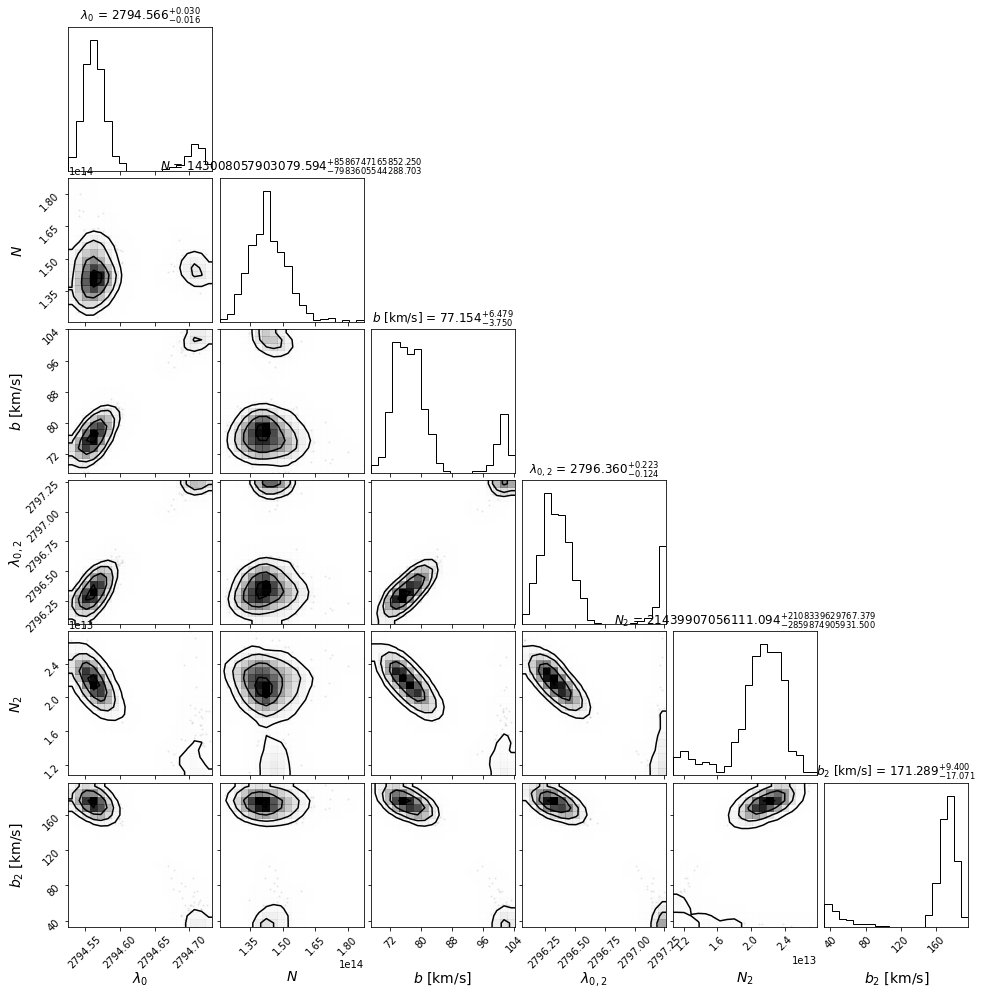

In [59]:
samples = np.vstack([sim_x_0, sim_N, sim_b, sim_x_02, sim_N2, sim_b2]).T

# Define parameter labels for the plot
labels = [r"$\lambda_0$", r"$N$", r"$b$ [km/s]","$\lambda_{0,2}$", r"$N_2$" , r"$b_2$ [km/s]"]


# Create the corner plot
fig = corner.corner(
    samples,
    labels=labels,
    show_titles=True,
    title_fmt=".3f",
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    smooth=1.0  # Apply KDE smoothing (optional)
)

plt.show()

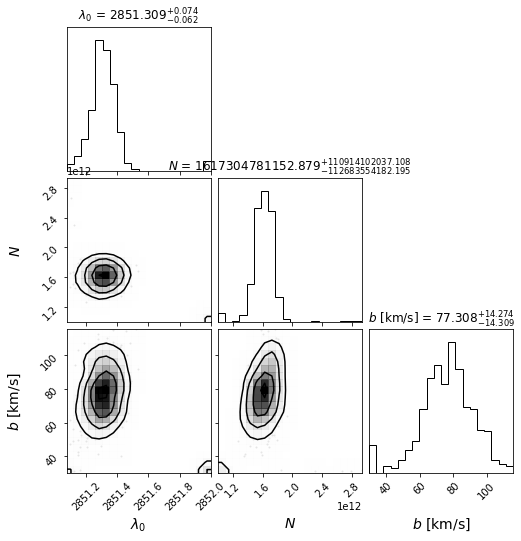

In [60]:
samples2 = np.vstack([sim_x_03, sim_N3, sim_b3]).T

# Define parameter labels for the plot
labels2 = [r"$\lambda_0$", r"$N$", r"$b$ [km/s]"]


# Create the corner plot
fig = corner.corner(
    samples2,
    labels=labels2,
    show_titles=True,
    title_fmt=".3f",
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    smooth=1.0  # Apply KDE smoothing (optional)
)

plt.show()

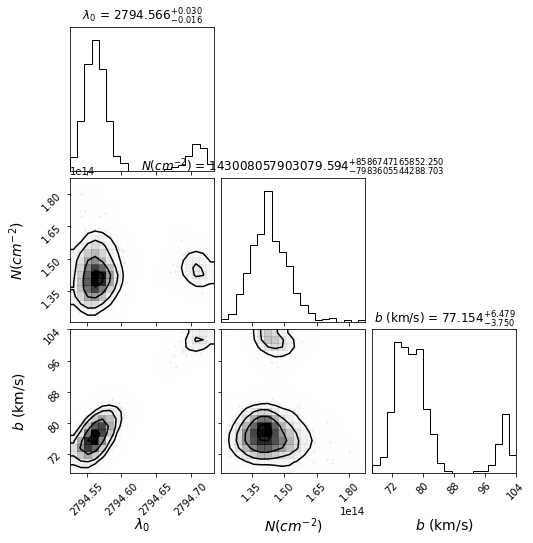

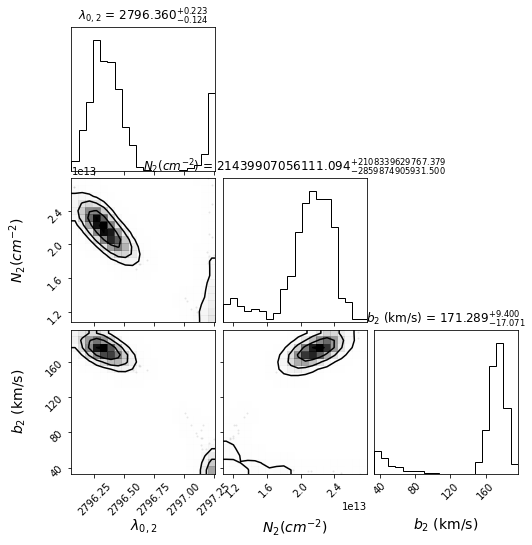

In [63]:
samples_1 = np.vstack([sim_x_0, sim_N, sim_b]).T
samples_2 = np.vstack([sim_x_02, sim_N2, sim_b2]).T


# Define parameter labels for the plot
labels_1 = [r"$\lambda_0$", r"$N (cm^{-2})$", r"$b$ (km/s)"]
labels_2 = [r"$\lambda_{0,2}$", r"$N_2 (cm^{-2})$" , r"$b_2$ (km/s)"]



# Create the corner plot
fig = corner.corner(
    samples_1,
    labels=labels_1,
    show_titles=True,
    title_fmt=".3f",
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    smooth=1.0  # Apply KDE smoothing (optional)
)

fig = corner.corner(
    samples_2,
    labels=labels_2,
    show_titles=True,
    title_fmt=".3f",
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    smooth=1.0  # Apply KDE smoothing (optional)
)

plt.show()

In [51]:
# Batas Deteksi

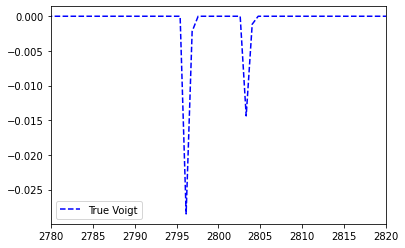

In [95]:
#(recovered_peak_2796, recovered_N, recovered_b, 
# recovered_peak2_2796, recovered_N2, recovered_b2) = popt

recovered_peak_2796 = lambda_2796
recovered_N = 10 ** (11.8)
recovered_b = 30

recovered_peak_2804 = recovered_peak_2796 + (lambda_2804 - lambda_2796)

fwhm_L_2796 = ((recovered_peak_2796**2) * A_2796) / (2 * np.pi * c.value * 1e10)
fwhm_L_2804 = ((recovered_peak_2804**2) * A_2804) / (2 * np.pi * c.value * 1e10)
    
fwhm_G_2796 = (2 * recovered_peak_2796 * recovered_b * np.sqrt(np.log(2))) / c_kms
fwhm_G_2804 = (2 * recovered_peak_2804 * recovered_b * np.sqrt(np.log(2))) / c_kms
    
amp_V_2796 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2796 * recovered_peak_2796 * 1e-8 * recovered_N) / (m_e.cgs.value * c.cgs.value * recovered_b * 1e5))
amp_V_2804 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2804 * recovered_peak_2804 * 1e-8 * recovered_N) / (m_e.cgs.value * c.cgs.value * recovered_b * 1e5))

voigt_peak_targets = [amp_V_2796, amp_V_2804]
fwhm_Ls = [fwhm_L_2796, fwhm_L_2804]  
fwhm_Gs = [fwhm_G_2796, fwhm_G_2804]          
centers = [recovered_peak_2796, recovered_peak_2804]

def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
    def residual(amplitude_L):
        model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        return model(0) - target_peak
        
    sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
    return sol.root
    
models = []
amp_Ls = []

for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
    amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
    amp_Ls.append(amp_L)
    model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
    models.append(model)
    
def combined_voigt(x):
    return sum(m(x) for m in models)
    
true_spectrum = combined_voigt(wavelengths)

plt.plot(wavelengths, true_spectrum, '--', label="True Voigt", color='blue')
plt.xlim(2780, 2820)
plt.legend()

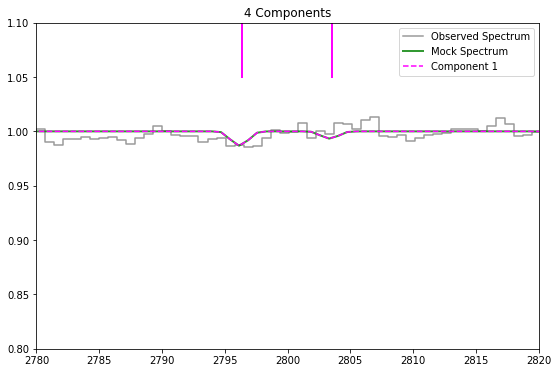

In [96]:
fitted_spectrum = convolve(true_spectrum, lsf_observed, normalize_kernel=True)

plt.figure(figsize=(9,6))
plt.plot(wavelengths_A, fluxes_A+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
#plt.plot(wavelengths, true_spectrum+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_A, fitted_spectrum+1, label="Mock Spectrum", lw=2, alpha=0.8, color='green')

v1 = (Voigt1D(x_0=recovered_peak_2796, amplitude_L=amp_Ls[0], fwhm_L=fwhm_L_2796, fwhm_G=fwhm_G_2796)
     + Voigt1D(x_0=recovered_peak_2804, amplitude_L=amp_Ls[1], fwhm_L=fwhm_L_2804, fwhm_G=fwhm_G_2804))

plt.plot(wavelengths, 1 - convolve(v1(wavelengths), lsf_observed, normalize_kernel=True), '--', 
         label='Component 1', color='magenta')

line_positions1 = [recovered_peak_2796, recovered_peak_2804]

for xpos in line_positions1:
    plt.plot([xpos, xpos], [1.05, 1.1], color='magenta', linewidth=2)
    
plt.xlim(2780, 2820)
plt.title("4 Components")
plt.ylim(0.8,1.1)
plt.legend()

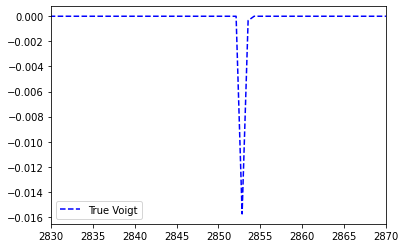

In [84]:
#(recovered_peak_2853, recovered_N_2853, recovered_b_2853) = popt2

recovered_peak_2853 = lambda_2853
recovered_N_2853 = 10 ** (10.9)
recovered_b_2853 = 30

fwhm_L_2853 = ((recovered_peak_2853**2) * A_2853) / (2 * np.pi * c.value * 1e10)
    
fwhm_G_2853 = (2 * recovered_peak_2853 * recovered_b_2853 * np.sqrt(np.log(2))) / c_kms
    
amp_V_2853 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2853 * recovered_peak_2853 * 1e-8 * recovered_N_2853) / (m_e.cgs.value * c.cgs.value * recovered_b_2853 * 1e5))

voigt_peak_targets = [amp_V_2853]
fwhm_Ls = [fwhm_L_2853]  
fwhm_Gs = [fwhm_G_2853]          
centers = [recovered_peak_2853]

def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
    def residual(amplitude_L):
        model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        return model(0) - target_peak
        
    sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
    return sol.root
    
models = []
amp_Ls = []

for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
    amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
    amp_Ls.append(amp_L)
    model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
    models.append(model)
    
def combined_voigt(x):
    return sum(m(x) for m in models)
    
true_spectrum_2853 = combined_voigt(wavelengths2)

plt.plot(wavelengths2, true_spectrum_2853, '--', label="True Voigt", color='blue')
plt.xlim(2830, 2870)
plt.legend()

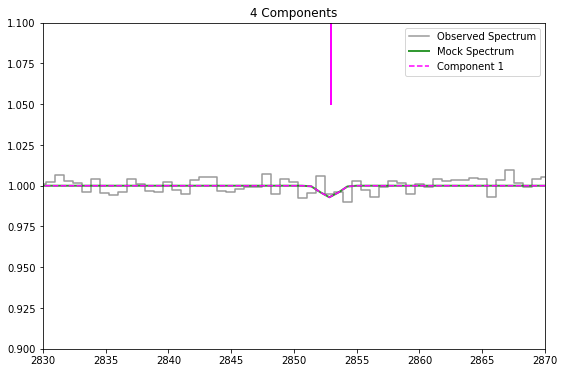

In [85]:
fitted_spectrum_2853 = convolve(true_spectrum_2853, lsf_observed, normalize_kernel=True)

plt.figure(figsize=(9,6))
plt.plot(wavelengths_A2, fluxes_A2+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
#plt.plot(wavelengths, true_spectrum+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_A2, fitted_spectrum_2853+1, label="Mock Spectrum", lw=2, alpha=0.8, color='green')

v1 = Voigt1D(x_0=recovered_peak_2853, amplitude_L=amp_Ls[0], fwhm_L=fwhm_L_2853, fwhm_G=fwhm_G_2853)

plt.plot(wavelengths2, 1 - convolve(v1(wavelengths2), lsf_observed, normalize_kernel=True), '--', 
         label='Component 1', color='magenta')

line_positions1 = [recovered_peak_2853]

for xpos in line_positions1:
    plt.plot([xpos, xpos], [1.05, 1.1], color='magenta', linewidth=2)
    
plt.xlim(2830, 2870)
plt.title("4 Components")
plt.ylim(0.9,1.10)
plt.legend()